### Redes neurais: 🌀

O contexto histórico das redes neurais data do anos 1940, de modo que um psicologo junto de um lógico matemático - esqueci os respcetivos nomes dos pesquisadores - objetivavam criar um neurônio artificial com base no orgânico. Com base nisso, tal neurônio, semelhante ao seu homólogo, possuia entradas, um núcleo, no qual havia o processamento por meio de duas funções, e saídas, semelhante segmento dendritos, núcleo e axônio.

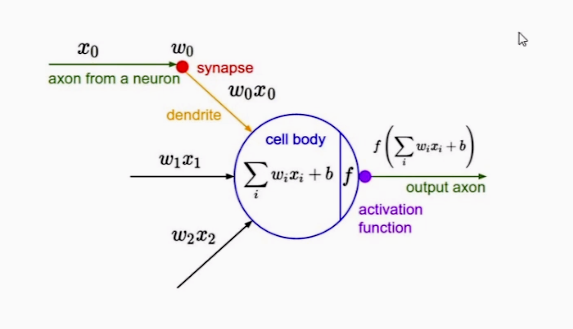

###Tensor:

Tensor é o nome dado na matemática para matrizes que possuem acima de duas dimensões, porém na computação é comum se refetir como tensor qualquer tipo de matriz, inclusive aquelas que não possuem sequer uma dimensão.

In [ ]:
import torch

# Criando tensores:

lista = [[1,2,4],
         [5,6,8]]

# Importante verificar que o tensor, ao converter a lista,
# transforma o tipo dos dados, de modo que antes estava em inteiro
# e agora está em float.

tns = torch.Tensor(lista)
print(tns)
print(tns.dtype)

print("")

# Mas há como alterar isso, bastando especificar, como :

tns_long = torch.LongTensor(lista)
print(tns_long)
print(tns_long.dtype)

print("")

# Ainda há uma forma de, a depender dos casos, aumentar a
# precisão da matriz criada por meio do double:

tns_double = torch.DoubleTensor(lista)
print(tns_double)

# Note que o tipo de dados mostrados ilustram o tensor gerado. Ainda que
# em relação à primeira e a última os dados se mostram em sua condição float,
# a precisão de cada qual é diferente, demonstrado por meio do tipo dos dados.

tensor([[1., 2., 4.],
        [5., 6., 8.]])
torch.float32

tensor([[1, 2, 4],
        [5, 6, 8]])
torch.int64

tensor([[1., 2., 4.],
        [5., 6., 8.]], dtype=torch.float64)


In [ ]:
import numpy as np

# Convertendo um array numpy:

array = np.random.rand(3,4).astype(int)

tns_numpy = torch.from_numpy(array)
print(tns_numpy)
print(tns_numpy.dtype)

# Vale verificar que no caso do numpy, os tensores criados não
# são transformados, mantendo-os em sua condição original.

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])
torch.int64


In [ ]:
# Criando tensores por meio do próprio tensor:

tns = torch.ones(3,3)
tns

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

###Classificador Linear:

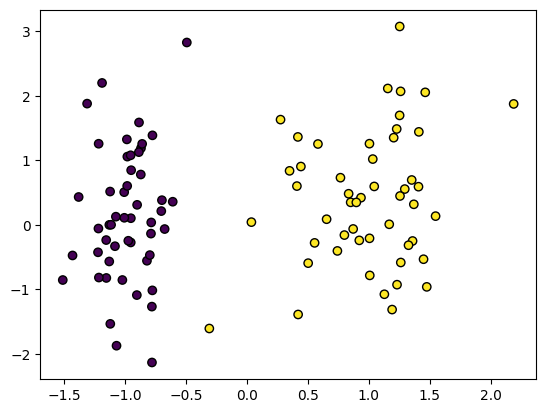

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

np.random.seed(22)

X, Y = make_classification(n_features = 2, n_redundant= 0, n_informative = 1,
                           n_clusters_per_class= 1)

plt.scatter(X[ : , 0], X[ : , 1], marker = "o", c = Y,
            edgecolor = "k")

p = X[10]


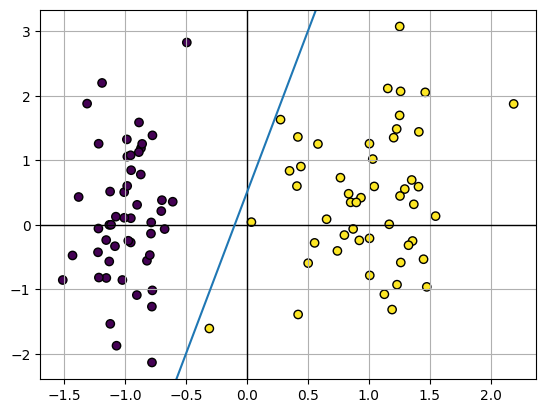

In [ ]:
# Criando um modelo de classificação por meio da reta:

def plotmodel(w1, w2, b):

  np.random.seed(22)

  plt.scatter(X[ : , 0], X[ : , 1], marker = "o", c = Y,
            edgecolor = "k")

  # Definindo x e y máximos para que o gráfico não mude a sua forma.

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2, 4, 50)
  y = (-w1*x - b) / w2


  plt.axvline(0, -1, 1, color = "k", linewidth = 1)
  plt.axhline(0, -2, 4, color = "k", linewidth = 1)
  plt.plot(x, y)
  plt.grid(True)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = -5
w2 =  1
b =  -0.5

plotmodel(w1, w2, b)


In [ ]:
# Criando uma função que irá classificar um valor com base
# na sua posição em relação ao modelo, que é a linha reta que
# separa os dados em duas categorias.

def classify (ponto, w1, w2, b):

  reta = w1*ponto[0] + w2*ponto[1] + b

  if reta >= 0:
    return 1, "yellow"
  else:
    return 0, "purple"

p = (2, -1)

classe, cor = classify(p, w1, w2, b)
print(classe, cor)

0 purple


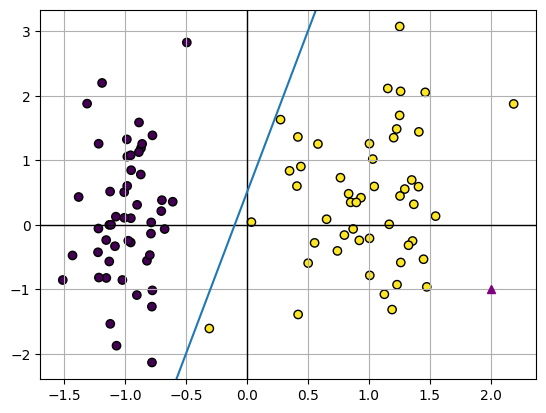

In [ ]:
plotmodel(w1, w2, b)
plt.plot(p[0], p[1], marker = '^', color = cor)

Por alguma razão o classificador errou, preciso entender o motivo.

###Implementando uma rede neural com PyTorch:

**Criando um conjunto de dados que servirá de estudo à rede neural:**

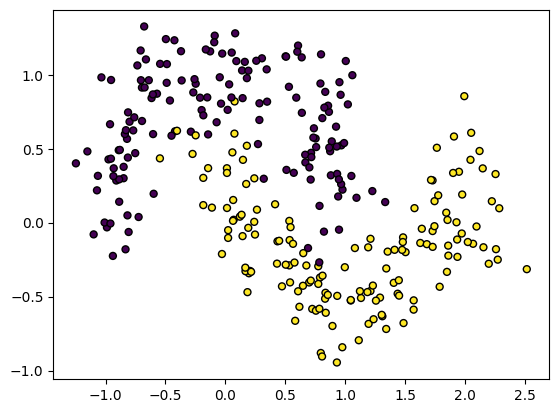

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples = 300, noise = 0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker = 'o',
            c = Y1, s = 25, edgecolor = 'k')

In [ ]:
import torch
from torch import nn # nn = neural networks

# Instanciando um neurônio:

# Passo como parâmetro a quantidade de dados de entrada, que serão
# as variáveis explicativas do modelo, passando em sequência o parâmetro
# que se refere à(s) variável(is) resposta(s). O bias por padrão já é colocado
# como True no modelo.

perceptron = nn.Linear(3, 1)
perceptron

Linear(in_features=3, out_features=1, bias=True)

In [ ]:
# Caso eu queira ver os coeficientes do modelo:

for nome, tensor in perceptron.named_parameters():

  print(nome, tensor.data)

weight tensor([[-0.0310, -0.4136,  0.2506]])
bias tensor([0.3694])


###Camadas de neurônios:

Um neurônio não é capaz de realizar funções matemáticas não lineares, de modo que não se faz apto para solucionar problemas mais complexos que não são passíveis de solução via forma linear. Porém, há um modo com o qual pode-se solucionar tais questões, bastando apenas criar uma camada de "neurônios stealths" que podem cada qual produzir um como saída uma função não linear, produzindo um todo que permita ao neurônio a realização de tais tarefas.

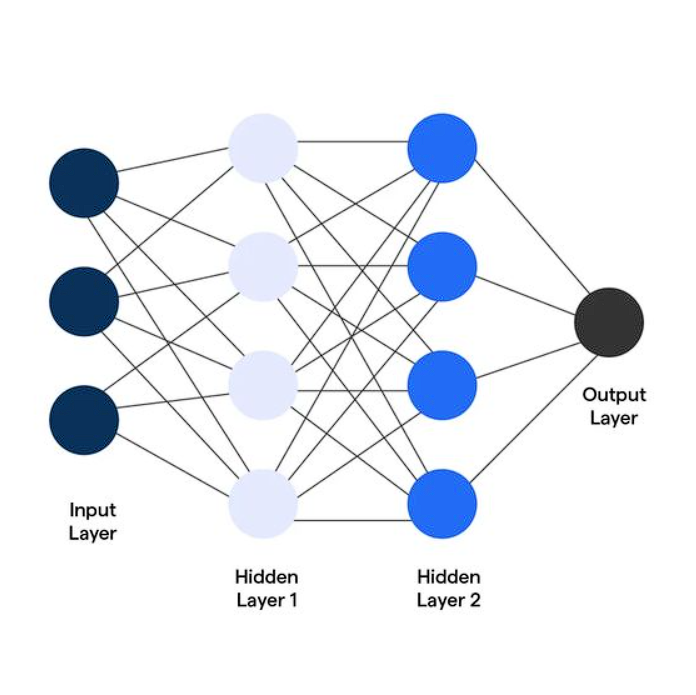

Como pode ser visto na figura acima, cria-se uma camada (ainda que aqui sejam duas) de neurônios stealths, os quais são responsáveis por gerar uma saída não linear, as que são enviadas ao Perceptron, que retorna uma resposta. Para cenários binários, os quais a saída pode ser compreendida em Sim ou Não, adota-se um único Perceptron.

Mas como criar isso em termos de código ?

Em termos de código a criação de uma rede neural obedece a seguinte estrutura: Um container que irá abrigar a criação dos neurônios que receberão a entrada, depois a função de saída, depois o Perceptron e, por fim, a função de saída desse. Esquematicamente:

- Containter (sequential);
- Neurônios stealths;
- Função de ativação (tem que ser não linear);
- Neurônio;
- Função de ativação do neurônio anterior.

In [ ]:
import torch
from torch import nn # nn = neural networks

# Variáveis de entrada à rede.
input_size = 2

# Aqui há a porção escondida da rede neural. Trata-se de um hiperparâmetro
# responsável por criar neurônios escondidos, de modo a fazer o modelo aprender
# cenários complexos. Ele perpassa o escopo da otimização, uma vez que demanda
# capacidade de processamento / precisão do modelo, na medida que nessa busca-se
# o ponto de ótimo da melhor precisão possível com a menor exigência do equipamento.
# No caso presente, porém, arbitrariamente, estou passando 8 neurônios escondidos.
hidden_size = 8

# Saída do neurônio.
output_size = 1

network = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size),  # neurônio stealth
                        nn.ReLU(),     # instanciando ReLU como uma camada
                        nn.Linear(in_features=hidden_size, out_features=output_size)) # último neurônio, a saída.


In [ ]:
# Visualizando as informações sobre a nossa rede, como quantidade de parâmetros
# e o tamanho que cada elemento ocupa na memória.

from torchsummary import summary

summary(network, input_size = (1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


**Forward:**

Fazendo os dados passarem aos dados.

In [ ]:
tensor.size()

torch.Size([300, 2])

In [ ]:
# Transformando um array numpy em um tensor, para
# que possa ser lido pela rede neural. Não obstante,
# devo transformar o array em seu tipo float32, pois
# é o modo com o qual as redes lêem, de modo que não
# leriam o array em sua forma float64.
tensor = torch.from_numpy(X1).float()

# Armazenando os dados gerados ao passar o tensor pela rede.
pred = network(tensor)

print(pred.size())

torch.Size([300, 1])


Note que o tamanho do tensor mudou ao o que ele era antes de passar pela rede neural. Isso ocorre, pois por se tratar de um problema binário e na presença de apenas um perceptron de saída, a saída possui apenas uma dimensão, "uma coisa ou outra".

###Classe nn.Module

A forma mais organizada de definir modelos em PyTorch é implementando uma classe nos moldes da classe nn.Module. A sua real importância é vista para a construção de redes complexas e maiores, que ficam mais fáceis de serem implementadas e realizar manutenção desse modo.

As funções obrigatórias do nn.Module são:

- __ init__() : definição de hiperparâmetros e instancia o modelo;
- forward() : Fluxo de entrada para produzir uma saída.  

In [ ]:
class Network(nn.Module):

  # Define uma arquitetura.

  def __init__(self, input_size, hidden_size, output_size):

    super(Network, self).__init__()

    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)

  # Gera uma saída a partir dos dados de entrada.

  def forward(self, X):

    # A saída aqui é de dentro para fora, quero dizer:
    # produz-se um resultado primeiro no self.hidden(X),
    # o qual é passado para relu, que posteriormente irá
    # produzir outro valor, o qual será armazenado na
    # variável hidden.
    hidden = self.relu(self.hidden(X))

    # Armazena o valor encontrado com o hidden.
    output = self.output(hidden)

    return output



**Instanciando a rede:**

In [ ]:
# Variáveis de entrada à rede.
input_size = 2

# Aqui há a porção escondida da rede neural. Trata-se de um hiperparâmetro
# responsável por criar neurônios escondidos, de modo a fazer o modelo aprender
# cenários complexos. Ele perpassa o escopo da otimização, uma vez que demanda
# capacidade de processamento / precisão do modelo, na medida que nessa busca-se
# o ponto de ótimo da melhor precisão possível com a menor exigência do equipamento.
# No caso presente, porém, arbitrariamente, estou passando 8 neurônios escondidos.
hidden_size = 8

# Saída do neurônio.
output_size = 1


net = Network(input_size, hidden_size, output_size)

**Forward:**

In [ ]:
# Transformando um array numpy em um tensor, para
# que possa ser lido pela rede neural. Não obstante,
# devo transformar o array em seu tipo float32, pois
# é o modo com o qual as redes lêem, de modo que não
# leriam o array em sua forma float64.
tensor = torch.from_numpy(X1).float()

# Armazenando os dados gerados ao passar o tensor pela rede.
pred = net(tensor)

print(pred.size())

torch.Size([300, 1])
